<a href="https://colab.research.google.com/github/Kwangbin/Keras_Basic/blob/main/kaggle_sk_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/ml/kaggle/sk_data1/

/content/drive/MyDrive/ml/kaggle/sk_data1


In [3]:
ls

sample_submission.csv  test.csv  train.csv


In [4]:
import os
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [6]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


id 
age : 나이 
workclass : 고용 형태 
fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자) 
education : 교육 수준 
education_num : 교육 수준 수치 
marital_status: 결혼 상태 
occupation : 업종 
relationship : 가족 관계 
race : 인종 
sex : 성별 
capital_gain : 양도 소득 
capital_loss : 양도 손실 
hours_per_week : 주당 근무 시간 
native_country : 국적 
income : 수익 (예측해야 하는 값) 
>50K : 1 
<=50K : 0 

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


csv 가 dataframe으로 올라오면 Dtype 으로 고정 되어 커진다즉 0이 한바이트가 int64로 되서 64바리트로 고정

즉, 읽어오는 데이터 타입을 고정 하여 메모리 사용 량을 줄인다

먼저 descrive로 속성 파악

In [8]:
train = pd.read_csv('train.csv')

In [9]:
# 오브젝트는 않나온다  수치데이터만 나온다
# 이상데이터 확인
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [10]:
#데이터 확인
train.sample(10)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
19354,19354,35,Private,92440,12th,8,Divorced,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,>50K
3382,3382,35,Private,204527,Masters,14,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,>50K
11975,11975,23,Private,13769,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,30,United-States,<=50K
7138,7138,21,?,180339,Some-college,10,Never-married,?,Own-child,White,Female,0,0,25,United-States,<=50K
11659,11659,48,Federal-gov,100067,Some-college,10,Widowed,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
7409,7409,33,Private,80058,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
19371,19371,24,Private,223811,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
2300,2300,64,Self-emp-inc,181408,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
11197,11197,38,Private,175232,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,45,United-States,<=50K
23968,23968,21,Private,174907,Assoc-acdm,12,Never-married,Sales,Own-child,White,Female,0,0,32,United-States,<=50K


In [11]:
#이상 데이터 항목 추가확인
train.native_country.value_counts()

United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Columbia                         52
Guatemala                        52
Vietnam                          50
Italy                            50
Dominican-Republic               48
Japan                            47
Poland                           47
Taiwan                           39
Iran                             35
Haiti                            35
Portugal                         30
Nicaragua                        28
Peru                             26
France                      

데이터 까보면 특성이 틀림
즉 전체는 DF 인데 개별 항목은 Series

In [12]:
type(train)

pandas.core.frame.DataFrame

In [13]:
type(train.native_country)

pandas.core.series.Series

In [14]:
train['native_country']

0        United-States
1        United-States
2        United-States
3        United-States
4                    ?
             ...      
26044    United-States
26045    United-States
26046    United-States
26047    United-States
26048    United-States
Name: native_country, Length: 26049, dtype: object

train['native_country'].  힌트 않나옴
train.native_country.  힌트 나옴

In [15]:
train['native_country']

0        United-States
1        United-States
2        United-States
3        United-States
4                    ?
             ...      
26044    United-States
26045    United-States
26046    United-States
26047    United-States
26048    United-States
Name: native_country, Length: 26049, dtype: object

In [16]:
#반드시 함수뒤에 () 확인
 train.native_country(10)

IndentationError: ignored

In [17]:
train.capital_gain.describe()

count    26049.00000
mean      1087.68970
std       7388.85469
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      99999.00000
Name: capital_gain, dtype: float64

In [18]:
train.capital_gain.describe(percentiles=[.99])

count    26049.00000
mean      1087.68970
std       7388.85469
min          0.00000
50%          0.00000
99%      15024.00000
max      99999.00000
Name: capital_gain, dtype: float64

In [19]:
#직접 이상치 확인
# train.capital_gain에 값이 99999인것을 찾아라
# : 전체 표시하라
train.loc[train.capital_gain == 99999, :]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
227,227,24,?,151153,Some-college,10,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,99999,0,50,South,>50K
430,430,55,Private,408537,9th,5,Divorced,Craft-repair,Unmarried,White,Female,99999,0,37,United-States,>50K
848,848,32,Private,330715,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
852,852,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
1209,1209,37,Local-gov,287306,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Wife,Black,Female,99999,0,40,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25535,25535,55,Private,197399,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
25648,25648,64,Self-emp-inc,185912,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,35,United-States,>50K
25705,25705,41,Private,115932,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
25824,25824,50,Self-emp-not-inc,132716,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K


In [20]:
train.capital_gain < 99999

0        True
1        True
2        True
3        True
4        True
         ... 
26044    True
26045    True
26046    True
26047    True
26048    True
Name: capital_gain, Length: 26049, dtype: bool

In [21]:
#iloc 는 loc와 틀리게 숫자로 해야 한다
# 인덱스 번호가 이름이 아니라 숫자번호로 써라


In [22]:
train.loc[train.race =='White', :]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
6,6,43,State-gov,206139,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26042,26042,48,Self-emp-not-inc,191389,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,50,United-States,<=50K
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K


In [23]:
train.income

0         >50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
26044    <=50K
26045    <=50K
26046    <=50K
26047    <=50K
26048    <=50K
Name: income, Length: 26049, dtype: object

In [24]:
train.income.map

<bound method Series.map of 0         >50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
26044    <=50K
26045    <=50K
26046    <=50K
26047    <=50K
26048    <=50K
Name: income, Length: 26049, dtype: object>

In [25]:
train.income.map(lambda x: x =='>50K')

0         True
1        False
2        False
3        False
4        False
         ...  
26044    False
26045    False
26046    False
26047    False
26048    False
Name: income, Length: 26049, dtype: bool

In [26]:
train.income.map(lambda x: int(x =='>50K'))

0        1
1        0
2        0
3        0
4        0
        ..
26044    0
26045    0
26046    0
26047    0
26048    0
Name: income, Length: 26049, dtype: int64

In [27]:
train.apply

<bound method DataFrame.apply of           id  age         workclass  ...  hours_per_week native_country  income
0          0   40           Private  ...              60  United-States    >50K
1          1   17           Private  ...              20  United-States   <=50K
2          2   18           Private  ...              16  United-States   <=50K
3          3   21           Private  ...              25  United-States   <=50K
4          4   24           Private  ...              20              ?   <=50K
...      ...  ...               ...  ...             ...            ...     ...
26044  26044   57           Private  ...              52  United-States   <=50K
26045  26045   23           Private  ...              40  United-States   <=50K
26046  26046   78                 ?  ...              15  United-States   <=50K
26047  26047   26  Self-emp-not-inc  ...              40  United-States   <=50K
26048  26048   20                 ?  ...              30  United-States   <=50K

[26049

In [28]:
train.shape

(26049, 16)

In [29]:
train[train.apply(lambda x: "?" in list(x), axis=1)]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,<=50K
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,<=50K
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,<=50K
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,<=50K
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K


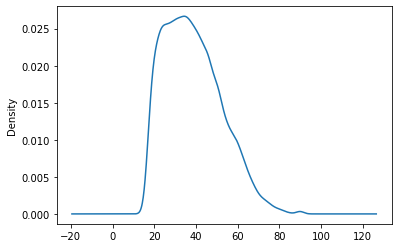

In [30]:
#걍 판다스의 plot을 써라
#간단하게 그리기
train.age.plot(kind="kde")

2.결측치 처리

In [31]:
#  행에   ? 가 하나만 있면 True
# 축
# apply , lamda 숙지 하기
#https://koreadatascientist.tistory.com/115
train.apply(lambda x: "?" in list(x), axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
26044    False
26045    False
26046     True
26047    False
26048     True
Length: 26049, dtype: bool

In [32]:
# ? 찾기
#train.loc[train.apply(lambda x: "?" in list(x), axis=1),:]

train[train.apply(lambda x: "?" in list(x), axis=1)]


,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,<=50K
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,<=50K
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,<=50K
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,<=50K
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K


In [33]:
train.occupation.value_counts()

Prof-specialty       3304
Craft-repair         3262
Exec-managerial      3246
Sales                2998
Adm-clerical         2983
Other-service        2626
Machine-op-inspct    1582
?                    1508
Transport-moving     1270
Handlers-cleaners    1092
Farming-fishing       784
Tech-support          742
Protective-serv       522
Priv-house-serv       123
Armed-Forces            7
Name: occupation, dtype: int64

In [34]:
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

결측치 처리
삭제? 대치?

In [35]:
# && 가 아니라 &임
# 비트연산에서 T,F 하나씩 비교 할려면 &가 하나여야 한다.
# ?가 양쪽인거 찾기
train[(train['workclass'] == '?')&(train['occupation'] == '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,<=50K
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,<=50K
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,<=50K
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,<=50K
67,67,65,?,404601,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,2414,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,<=50K
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K


In [36]:
#반대로 == 가 아니라 != 으로 하면
# No == ? 생각????
train[(train['workclass'] != '?')&(train['occupation'] == '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7929,7929,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
8698,8698,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
13008,13008,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K
15076,15076,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
17531,17531,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
24153,24153,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K


In [37]:
# 
train[(train['workclass'] == '?')&(train['occupation'] != '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [38]:
# workclass dptj ?를 No 대치
train.loc[(train.age >= 30)&(train.workclass=='?'), 'workclass'] = 'No'

In [39]:
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
State-gov            1043
Self-emp-inc          877
No                    868
Federal-gov           765
?                     634
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [40]:
# 나라중 ? 나라는 어떻게 처리 할까???
# 에러냐 미기입이냐
train.native_country.value_counts()

United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Columbia                         52
Guatemala                        52
Vietnam                          50
Italy                            50
Dominican-Republic               48
Japan                            47
Poland                           47
Taiwan                           39
Iran                             35
Haiti                            35
Portugal                         30
Nicaragua                        28
Peru                             26
France                      

Null check 관련 팁
데이터를 일일이 다 확인하지 않고 결측치가 있는지 확인하는 방법은?

In [41]:
# null 타입을 잘 확인하라...
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [42]:
2/7

0.2857142857142857

In [43]:
a=2/7

In [44]:
f"{a}"

'0.2857142857142857'

In [45]:
#f string
f"값은 : {a}"

'값은 : 0.2857142857142857'

In [46]:
f"값은 : {a:.2f}"

'값은 : 0.29'

In [47]:
print("a값은 :" + a)

TypeError: ignored

In [48]:
print("a값은 :" + str(a))

a값은 :0.2857142857142857


2.2 이상치 처리
수치형 데이터에 이상한 값이 없는지 한번 확인해보도록 하겠습니다.

In [49]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [50]:
# 힌트 않나올때 직접 함수 쳐서 확인 끝에 ?
# ?? 내부 코드 나옴
pd.Series.sort_values?

In [51]:
train.loc[train.capital_gain < 99999].sort_values('capital_gain', ascending=False)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
13280,13280,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,<=50K
12625,12625,19,Private,188815,HS-grad,9,Never-married,Other-service,Own-child,White,Female,34095,0,20,United-States,<=50K
2893,2893,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
17707,17707,20,?,273701,Some-college,10,Never-married,?,Other-relative,Black,Male,34095,0,10,United-States,<=50K
4703,4703,55,Self-emp-not-inc,145574,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,34095,0,60,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,9047,48,Private,180446,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
9046,9046,28,Private,273269,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,<=50K
9045,9045,36,Self-emp-not-inc,34180,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,70,United-States,>50K
9044,9044,23,?,283806,9th,5,Divorced,?,Not-in-family,White,Female,0,0,35,United-States,<=50K


In [52]:
train.loc[train.capital_gain == 99999, 'income']

227      >50K
430      >50K
848      >50K
852      >50K
1209     >50K
         ... 
25535    >50K
25648    >50K
25705    >50K
25824    >50K
25987    >50K
Name: income, Length: 127, dtype: object

In [53]:
sum(train.loc[train.capital_gain == 99999, 'income']==1)

0

log 표현

In [54]:
train["log_capital_gain"] = train.capital_gain.map(lambda x: np.log(x, where=(x!=0)))

In [55]:
#처리후'capital_gain', 'log_capital_gain' 보기
train[['capital_gain', 'log_capital_gain']]

,capital_gain,log_capital_gain
0,0,NaN
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
26044,0,0.0
26045,0,0.0
26046,0,0.0
26047,0,0.0


In [56]:
#처리후'capital_gain', 'log_capital_gain' 보기
train[['capital_gain', 'log_capital_gain']].describe()

,capital_gain,log_capital_gain
count,26049.00000,26048.000000
mean,1087.68970,0.743319
std,7388.85469,2.468809
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,0.00000,0.000000
max,99999.00000,11.512915


In [57]:
train.capital_gain.map(lambda x: np.log(x, where=(x!=0))).describe()

count    26049.000000
mean         0.743290
std          2.468766
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.512915
Name: capital_gain, dtype: float64

2.3 Scaling
Min-max Scaler: 범위가 정해진 값이 필요할 때
아웃라이어에 민감함

Standard Scaler: 평균을 0, 표준편차를 1로 맞추어 정규분포의 특성을 가지도록 만듦
아웃라이어에 영향을 덜 받음

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler()  ()안에 범위 지정 가능
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

In [60]:
mm_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [61]:
train['fnlwgt']

0        168538
1        101626
2        353358
3        151158
4        122234
          ...  
26044    250201
26045    238092
26046    165694
26047    151626
26048     99891
Name: fnlwgt, Length: 26049, dtype: int64

In [62]:
train['fnlwgt'].values

array([168538, 101626, 353358, ..., 165694, 151626,  99891])

In [63]:
type(train['fnlwgt'].values)

numpy.ndarray

In [64]:
train['fnlwgt'].values.shape

(26049,)

In [65]:
type(train['fnlwgt'].values.reshape(-1,1))

numpy.ndarray

In [66]:
train['fnlwgt'].values.reshape(-1,1).shape

(26049, 1)

In [67]:
#
mm_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))

array([[0.10521804],
       [0.05972864],
       [0.23086592],
       ...,
       [0.10328458],
       [0.0937206 ],
       [0.05854911]])

In [68]:
train['MM_fnlwgt'] = mm_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))
test['MM_fnlwgt'] = mm_scaler.transform(test['fnlwgt'].values.reshape(-1,1))

train['MM_age'] = mm_scaler.fit_transform(train['age'].values.reshape(-1,1))
test['MM_age'] = mm_scaler.transform(test['age'].values.reshape(-1,1))

train['ST_fnlwgt'] = st_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))
test['ST_fnlwgt'] = st_scaler.transform(test['fnlwgt'].values.reshape(-1,1))

train['ST_age'] = st_scaler.fit_transform(train['age'].values.reshape(-1,1))
test['ST_age'] = st_scaler.transform(test['age'].values.reshape(-1,1))

In [69]:
train.describe()[['MM_fnlwgt', 'MM_age']]

,MM_fnlwgt,MM_age
count,26049.000000,26049.000000
mean,0.120016,0.295469
std,0.072040,0.187281
min,0.000000,0.000000
25%,0.070934,0.150685
50%,0.112239,0.273973
75%,0.152261,0.424658
max,1.000000,1.000000


In [70]:
train.describe()[['ST_fnlwgt', 'ST_age']].round(6)

,ST_fnlwgt,ST_age
count,26049.000000,26049.000000
mean,-0.000000,-0.000000
std,1.000019,1.000019
min,-1.665991,-1.577710
25%,-0.681329,-0.773101
50%,-0.107947,-0.114784
75%,0.447609,0.689826
max,12.215444,3.761972


Feature Engineering

변수의 종류
변수 종류에 따라서 어떤 차이점이 있는지 살펴봅시다

In [71]:
#카테고리변수를 확인 하는 방법
# dtype이 object 이면 카테고리변수일 확률이 높다
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                26049 non-null  int64  
 1   age               26049 non-null  int64  
 2   workclass         26049 non-null  object 
 3   fnlwgt            26049 non-null  int64  
 4   education         26049 non-null  object 
 5   education_num     26049 non-null  int64  
 6   marital_status    26049 non-null  object 
 7   occupation        26049 non-null  object 
 8   relationship      26049 non-null  object 
 9   race              26049 non-null  object 
 10  sex               26049 non-null  object 
 11  capital_gain      26049 non-null  int64  
 12  capital_loss      26049 non-null  int64  
 13  hours_per_week    26049 non-null  int64  
 14  native_country    26049 non-null  object 
 15  income            26049 non-null  object 
 16  log_capital_gain  26048 non-null  float6

In [72]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,MM_fnlwgt,MM_age,ST_fnlwgt,ST_age
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,NaN,0.105218,0.315068,-0.205413,0.104655
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0.0,0.059729,0.000000,-0.836872,-1.577710
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0.0,0.230866,0.013699,1.538759,-1.504564
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0.0,0.093402,0.054795,-0.369431,-1.285125
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0.0,0.073739,0.095890,-0.642391,-1.065686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K,0.0,0.160736,0.547945,0.565252,1.348143
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,0.0,0.152504,0.082192,0.450978,-1.138832
26046,26046,78,No,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K,0.0,0.103285,0.835616,-0.232253,2.884216
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,<=50K,0.0,0.093721,0.123288,-0.365014,-0.919393


즉 카테고리 변수를 찾아라....
카테고리변수


**인코딩**
알고리즘이 이해하기 어려운 Feature들을 어떻게 처리할 지 알아봅시다

In [73]:
#원핫인코딩
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [74]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,MM_fnlwgt,MM_age,ST_fnlwgt,ST_age
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,NaN,0.105218,0.315068,-0.205413,0.104655
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0.0,0.059729,0.000000,-0.836872,-1.577710
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0.0,0.230866,0.013699,1.538759,-1.504564
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0.0,0.093402,0.054795,-0.369431,-1.285125
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0.0,0.073739,0.095890,-0.642391,-1.065686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K,0.0,0.160736,0.547945,0.565252,1.348143
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,0.0,0.152504,0.082192,0.450978,-1.138832
26046,26046,78,No,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K,0.0,0.103285,0.835616,-0.232253,2.884216
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,<=50K,0.0,0.093721,0.123288,-0.365014,-0.919393


Onehot encoder

In [75]:
oe = OneHotEncoder()
oe_result = oe.fit_transform(train['workclass'].values.reshape(-1, 1))

In [76]:
oe.get_feature_names(['workclass'])

array(['workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_No', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay'], dtype=object)

In [77]:
oe_result

<26049x10 sparse matrix of type '<class 'numpy.float64'>'
	with 26049 stored elements in Compressed Sparse Row format>

In [78]:
#array로 변경
oe_result.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [80]:
#원핫인코더 재구성
oe_result.toarray().shape

(26049, 10)

In [81]:
 sub = pd.DataFrame(data=oe_result.toarray(), columns=oe.get_feature_names(['workclass']))

In [82]:
pd.concat([train, sub], axis=1)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,MM_fnlwgt,MM_age,ST_fnlwgt,ST_age,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_No,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,NaN,0.105218,0.315068,-0.205413,0.104655,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0.0,0.059729,0.000000,-0.836872,-1.577710,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0.0,0.230866,0.013699,1.538759,-1.504564,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0.0,0.093402,0.054795,-0.369431,-1.285125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0.0,0.073739,0.095890,-0.642391,-1.065686,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K,0.0,0.160736,0.547945,0.565252,1.348143,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,0.0,0.152504,0.082192,0.450978,-1.138832,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26046,26046,78,No,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K,0.0,0.103285,0.835616,-0.232253,2.884216,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,<=50K,0.0,0.093721,0.123288,-0.365014,-0.919393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Label encoder

느리다 

In [85]:
le = LabelEncoder()
le.fit_transform(train['workclass'].values.reshape(-1, 1))

array([5, 5, 5, ..., 4, 7, 0])

In [92]:
# zip 함수로 딕셔너리 타입으로 변경
dict(zip(train['workclass'].unique(), [0,1,2,3,4,5,6,7,8,9]))

{'?': 2,
 'Federal-gov': 6,
 'Local-gov': 4,
 'Never-worked': 9,
 'No': 5,
 'Private': 0,
 'Self-emp-inc': 7,
 'Self-emp-not-inc': 3,
 'State-gov': 1,
 'Without-pay': 8}

In [87]:

workclass_to_num = dict(zip(train['workclass'].unique(), [0,1,2,3,4,5,6,7,8,9]))

In [88]:
train['workclass'].map(workclass_to_num)

0        0
1        0
2        0
3        0
4        0
        ..
26044    0
26045    0
26046    5
26047    3
26048    2
Name: workclass, Length: 26049, dtype: int64

In [89]:
train['workclass'].unique()

array(['Private', 'State-gov', '?', 'Self-emp-not-inc', 'Local-gov', 'No',
       'Federal-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

사이킷런 인코딩은 불편한점이 너무 많아서.. 직접 만드는 게 나을 수도 있습니다.

(Target) Mean Encoding

In [93]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,MM_fnlwgt,MM_age,ST_fnlwgt,ST_age
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,NaN,0.105218,0.315068,-0.205413,0.104655
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0.0,0.059729,0.000000,-0.836872,-1.577710
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0.0,0.230866,0.013699,1.538759,-1.504564
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0.0,0.093402,0.054795,-0.369431,-1.285125
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0.0,0.073739,0.095890,-0.642391,-1.065686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K,0.0,0.160736,0.547945,0.565252,1.348143
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,0.0,0.152504,0.082192,0.450978,-1.138832
26046,26046,78,No,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K,0.0,0.103285,0.835616,-0.232253,2.884216
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,<=50K,0.0,0.093721,0.123288,-0.365014,-0.919393


In [94]:
male_positive = train.loc[train['sex']=='Male', "income"]
female_positive = train.loc[train['sex']=='Female', "income"]

In [95]:
(male_positive.value_counts() / male_positive.shape[0]).iloc[1]

0.3061434618464707

In [96]:
female_positive.value_counts() / female_positive.shape[0]

<=50K    0.888759
>50K     0.111241
Name: income, dtype: float64

onehot 인코딩 일괄적으로 하는 간단한 방법~

object 의 경우  한방에 가능

In [97]:
dummied = pd.get_dummies(train)

In [98]:
dummied

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,log_capital_gain,MM_fnlwgt,MM_age,ST_fnlwgt,ST_age,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_No,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,...,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,0,40,168538,9,0,0,60,NaN,0.105218,0.315068,-0.205413,0.104655,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,17,101626,5,0,0,20,0.0,0.059729,0.000000,-0.836872,-1.577710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2,18,353358,10,0,0,16,0.0,0.230866,0.013699,1.538759,-1.504564,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3,21,151158,10,0,0,25,0.0,0.093402,0.054795,-0.369431,-1.285125,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,4,24,122234,10,0,0,20,0.0,0.073739,0.095890,-0.642391,-1.065686,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,250201,7,0,0,52,0.0,0.160736,0.547945,0.565252,1.348143,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
26045,26045,23,238092,13,0,0,40,0.0,0.152504,0.082192,0.450978,-1.138832,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
26046,26046,78,165694,14,0,0,15,0.0,0.103285,0.835616,-0.232253,2.884216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
26047,26047,26,151626,9,0,0,40,0.0,0.093721,0.123288,-0.365014,-0.919393,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


3.3 PCA

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60, svd_solver='full')

In [111]:
pca.explained_variance_

AttributeError: ignored

In [106]:
dummied = dummied.drop(columns=['id', 'income_<=50K', 'income_>50K'])

KeyError: ignored

In [107]:
dummied

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,log_capital_gain,MM_fnlwgt,MM_age,ST_fnlwgt,ST_age,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_No,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,...,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,40,168538,9,0,0,60,NaN,0.105218,0.315068,-0.205413,0.104655,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,17,101626,5,0,0,20,0.0,0.059729,0.000000,-0.836872,-1.577710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,18,353358,10,0,0,16,0.0,0.230866,0.013699,1.538759,-1.504564,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,21,151158,10,0,0,25,0.0,0.093402,0.054795,-0.369431,-1.285125,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,24,122234,10,0,0,20,0.0,0.073739,0.095890,-0.642391,-1.065686,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,57,250201,7,0,0,52,0.0,0.160736,0.547945,0.565252,1.348143,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26045,23,238092,13,0,0,40,0.0,0.152504,0.082192,0.450978,-1.138832,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26046,78,165694,14,0,0,15,0.0,0.103285,0.835616,-0.232253,2.884216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26047,26,151626,9,0,0,40,0.0,0.093721,0.123288,-0.365014,-0.919393,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [108]:
X_train_std = st_scaler.fit_transform(dummied)

In [109]:
X_train_std

array([[ 0.10465521, -0.20541342, -0.42389338, ...,  0.33850621,
        -0.04385374, -0.02146818],
       [-1.57771032, -0.83687158, -1.9817924 , ...,  0.33850621,
        -0.04385374, -0.02146818],
       [-1.50456399,  1.53875949, -0.03441863, ...,  0.33850621,
        -0.04385374, -0.02146818],
       ...,
       [ 2.88421566, -0.23225265,  1.52348039, ...,  0.33850621,
        -0.04385374, -0.02146818],
       [-0.91939337, -0.36501439, -0.42389338, ...,  0.33850621,
        -0.04385374, -0.02146818],
       [-1.35827134, -0.85324502, -0.03441863, ...,  0.33850621,
        -0.04385374, -0.02146818]])

In [110]:
X_train_pca = pca.fit_transform(X_train_std)

ValueError: ignored

In [103]:
X_train_std = st_scaler.fit_transform(dummied)
X_train_pca = pca.fit_transform(X_train_std)

ValueError: ignored

In [ ]:
X_train_pca.shape

In [ ]:
X_train_2.shape

In [112]:
pca.explained_variance_ratio_

AttributeError: ignored

In [ ]:
X_train_2 = X_train_std - X_train_std.mean(axis=0)

res = np.dot(X_train_2, pca.components_.T)
res

In [ ]:
np.allclose(X_train_pca, res)